<a href="https://colab.research.google.com/github/yappy2000d/Digital-Image-Processing-Practice/blob/main/%E5%BD%B1%E5%83%8F%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import urllib.request
from io import BytesIO

from PIL import Image

url = 'url/to/image'

with urllib.request.urlopen(url) as response:
  image_data = response.read()

url_img = Image.open(BytesIO(image_data))

Image shape: (1200, 844, 3)


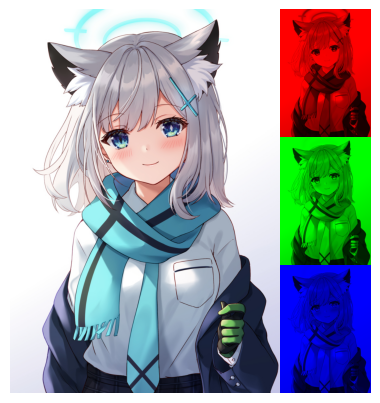

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_rgb import RGBAxes

rgb_img = np.asarray(url_img)

fig1 = plt.figure()

r = rgb_img[:,:,0]
g = rgb_img[:,:,1]
b = rgb_img[:,:,2]

ax1 = RGBAxes(fig1, [0.1, 0.1, 0.8, 0.8], pad=0.0)
ax1.RGB.axis('off')
ax1.R.axis('off')
ax1.G.axis('off')
ax1.B.axis('off')
ax1.imshow_rgb(r,g,b);

fig1.show()

print("Image shape:", rgb_img.shape)

# Gray Scale
$gray = (R+G+B) / 3$

Gray shape: (1200, 844)


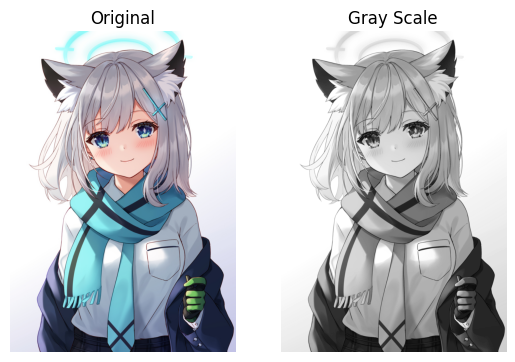

In [43]:
gray_img = np.mean(imageRGB, axis=2)
gray_img = gray_img.astype(np.uint8)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(rgb_img, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Original")

ax[1].imshow(gray_img, cmap='gray')
ax[1].axis('off')
ax[1].set_title("Gray Scale")

print("Gray shape:", gray_img.shape)

# Bit-Plane Slicing

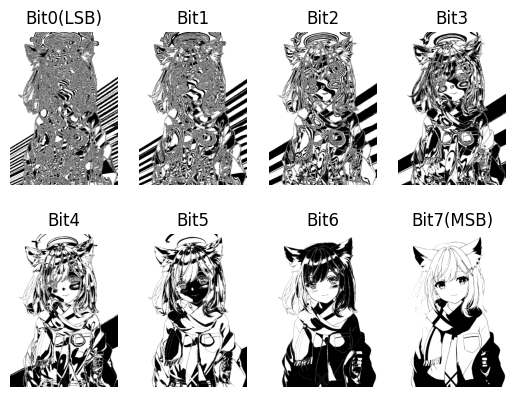

In [48]:
bitplane = []

for i in range(8):
  bitplane.append(gray_img & 2**i)

fig, ax = plt.subplots(2, 4)

for i in range(2):
  for j in range(4):
    ax[i, j].imshow(bitplane[i*4+j], cmap='gray')
    ax[i, j].axis('off')
    ax[i, j].set_title(f'Bit{i*4+j}')

ax[0, 0].set_title(f'Bit0(LSB)')
ax[1, 3].set_title(f'Bit7(MSB)')

fig.show()

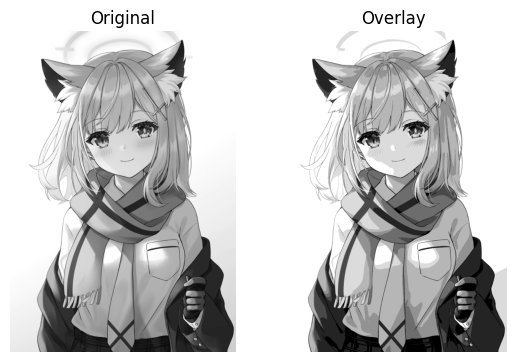

In [49]:
# 取每個pixel的第5~7bit重新組成一張圖
plane = [5, 6, 7]

overlay = bitplane[plane[0]]

for i in range(1, len(plane)):
  overlay += bitplane[plane[i]]

fig, ax = plt.subplots(1, 2)

ax[0].imshow(gray_img, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Original")

ax[1].imshow(overlay, cmap='gray')
ax[1].axis('off')
ax[1].set_title("Overlay")

fig.show()

## RGB 版本

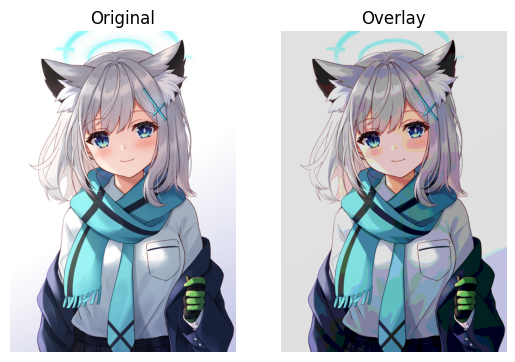

In [50]:
plane = [4, 5, 6, 7]

bitplane_r = []
bitplane_g = []
bitplane_b = []

for i in range(8):
  bitplane_r.append(r & 2**i)
  bitplane_g.append(g & 2**i)
  bitplane_b.append(b & 2**i)

total_r = bitplane_r[0]
total_g = bitplane_g[0]
total_b = bitplane_b[0]

for i in range(1, len(plane)):
  total_r += bitplane_r[plane[i]]
  total_g += bitplane_g[plane[i]]
  total_b += bitplane_b[plane[i]]

overlay = np.dstack((total_r, total_g, total_b))

fig, ax = plt.subplots(1, 2)

ax[0].imshow(rgb_img)
ax[0].axis('off')
ax[0].set_title("Original")

ax[1].imshow(overlay)
ax[1].axis('off')
ax[1].set_title("Overlay")

fig.show()

# Filter
銳化(Sharpen)
```py
filter = np.array(
  [
    [ 0, 0, 0, 0, 0],
    [ 0, 0,-1, 0, 0],
    [ 0,-1, 5,-1, 0],
    [ 0, 0,-1, 0, 0],
    [ 0, 0, 0, 0, 0],
  ]
)
```

模糊化(Blur)
```py
filter = np.array(
  [
    [ 0, 0, 0, 0, 0],
    [ 0, 1, 1, 1, 0],
    [ 0, 1, 1, 1, 0],
    [ 0, 1, 1, 1, 0],
    [ 0, 0, 0, 0, 0],
  ]
)
```

In [123]:
# 由於圖片太大，因此需要使用更大的濾波器
filter = np.array(
  [
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0,-1, 0, 0, 0, 0],
    [ 0, 0, 0,-1, 5,-1, 0, 0, 0],
    [ 0, 0, 0, 0,-1, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0],
  ]
)

length = len(filter)

In [124]:
def compute(image):
  suma = 0
  for i in range(length):
    for j in range(length):
      suma += image[i,j] * filter[i,j]
  if suma < 0:
    return 0
  elif suma > 255:
    return 255
  else:
    return suma

def convolute(image):
  X, Y = image.shape
  final = []
  for x in range(X-len(filter)+1):
    resault = []
    for y in range(Y-len(filter)+1):
      resault.append(compute(image[x:x+length, y:y+length]))
    final.append(resault)
  return np.array(final)

Original shape: (1200, 844, 3)
Filtered shape: (1192, 836, 3)


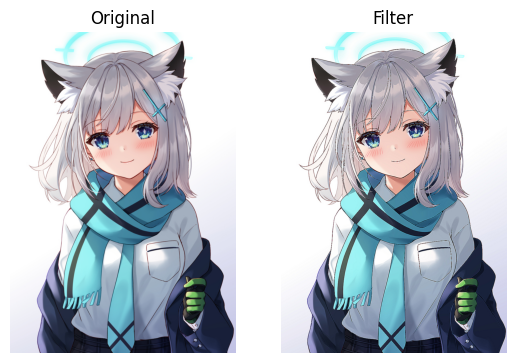

In [125]:
R = convolute(r)
G = convolute(g)
B = convolute(b)

filtered = np.dstack((R, G, B))

fig, ax = plt.subplots(1, 2)

ax[0].imshow(rgb_img)
ax[0].axis('off')
ax[0].set_title("Original")

ax[1].imshow(filtered)
ax[1].axis('off')
ax[1].set_title("Filter")

fig.show()
print(f'Original shape: {rgb_img.shape}')
print(f'Filtered shape: {filtered.shape}')

## 提升執行速度

除了使用更大的濾波器外，也能進行多次銳化處理。但在那之前得先解決Python可悲的執行速度。

根據[@Modesto Mas]()的實驗，得到下圖：

![](https://github.com/mmas/mmas.github.io/blob/396eb388200582de404dc6d5d6501287208f34ac/images/image_processing_performance_plot.png?raw=true)

> `opencv*` 表示關閉優化，更多詳情請見[原文](https://mmas.github.io/python-image-processing-libraries-performance-opencv-scipy-scikit-image)

### Speedup Part 1
由於NumPy的底層是用C++寫的，於是這裡用NumPy的內建函數來取代 `compute` 函數中的雙層迴圈。

In [103]:
filter = np.array(
  [
    [ 0, 0, 0, 0, 0],
    [ 0, 0,-1, 0, 0],
    [ 0,-1, 5,-1, 0],
    [ 0, 0,-1, 0, 0],
    [ 0, 0, 0, 0, 0],
  ]
)

length = len(filter)

In [107]:
def compute(image_patch):
  suma = np.sum(image_patch * filter)
  return np.clip(suma, 0, 255)

# 沿用原先的convolute函式

In [108]:
# R = convolute(r)
# G = convolute(g)
# B = convolute(b)

"""進行多次銳化處理"""
R = convolute(R)
G = convolute(G)
B = convolute(B)

Original shape: (1200, 844, 3)
Filtered shape: (1192, 836, 3)


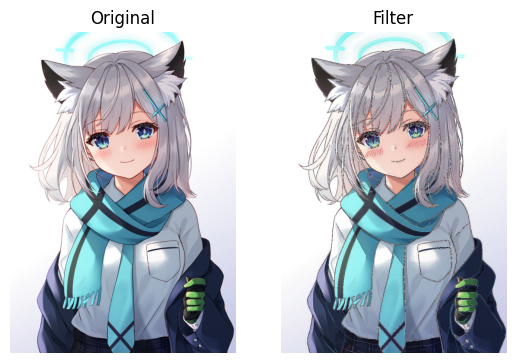

In [81]:
filtered = np.dstack((R, G, B))

fig, ax = plt.subplots(1, 2)

ax[0].imshow(rgb_img)
ax[0].axis('off')
ax[0].set_title("Original")

ax[1].imshow(filtered)
ax[1].axis('off')
ax[1].set_title("Filter")

fig.show()
print(f'Original shape: {rgb_img.shape}')
print(f'Filtered shape: {filtered.shape}')

### Speedup Part 2
使用OpenCV作弊

> **filter**: _np.float32_  
> **image**: _np.uint8_

In [85]:
import cv2

cv2.setUseOptimized(True)
cv2.useOptimized()

True

In [89]:
filter = np.array(
  [
    [ 0, 0, 0, 0, 0],
    [ 0, 0,-1, 0, 0],
    [ 0,-1, 5,-1, 0],
    [ 0, 0,-1, 0, 0],
    [ 0, 0, 0, 0, 0],
  ], dtype=np.float32
)

In [109]:
def convolute(image):
  image = image.astype(np.uint8)
  return cv2.filter2D(image, -1, filter)

In [118]:
R = convolute(r)
G = convolute(g)
B = convolute(b)

"""進行多次銳化處理"""
for i in range(2):
  R = convolute(R)
  G = convolute(G)
  B = convolute(B)

Original shape: (1200, 844, 3)
Filtered shape: (1200, 844, 3)


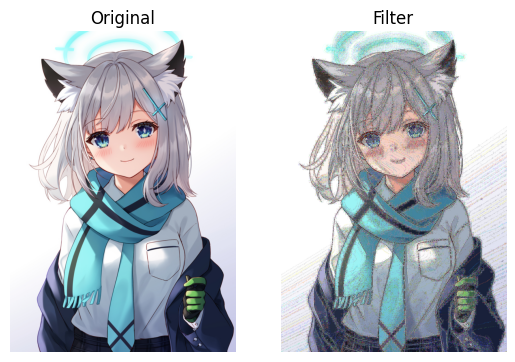

In [119]:
filtered = np.dstack((R, G, B))

fig, ax = plt.subplots(1, 2)

ax[0].imshow(rgb_img)
ax[0].axis('off')
ax[0].set_title("Original")

ax[1].imshow(filtered)
ax[1].axis('off')
ax[1].set_title("Filter")

fig.show()
print(f'Original shape: {rgb_img.shape}')
print(f'Filtered shape: {filtered.shape}')